In [7]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import random

def gauss(x, beta):
    mu    = beta[0]
    sigma = beta[1]
    a     = beta[2]

    return a*np.exp(-(x - mu)**2.0/(2.0*sigma**2.0))

def errorEval(v_cal, v_ref):
    print("--- Result ---", )
    for i in range(v_cal.size):
        error = (v_cal[i] - v_ref[i])/v_ref[i]
        print("beta[%d] error: %15e (eval %10e, true %10e)" % (i, error, v_cal[i], v_ref[i]))

In [8]:
def gradient_descent(x, y, beta, alpha):
    count = 0
    datasize = x.size 

    iters  = []
    errors = []

    while True:
        e2    = 0.0
        drivs = np.array([0.0, 0.0, 0.0]) 

        mu    = beta[0]
        sigma = beta[1]
        a     = beta[2]

        for xi, yi in zip(x, y):
            yt = gauss(xi, beta)
            ei  = yi - yt

            e2       += ei*ei
            drivs[0] -= 2.0*ei*yt*(xi - mu)/sigma**2.0
            drivs[1] -= 2.0*ei*yt*(xi - mu)**2.0/sigma**3.0
            drivs[2] -= 2.0*ei*yt/a

        e2 /= datasize 

        count += 1
        if count%1000 == 0:
            print("iteration %7d - error %e" % (count, e2))
            iters.append(count)
            errors.append(e2)

        beta -= alpha*drivs

        if e2 < 1.0e-5 or count == 100000:
            break

    return beta, iters, errors

In [9]:
# original values
mu    = 1.5
sigma = 0.4
a     = 1.0
alpha = 1.0e-4

betaRef = np.array([mu, sigma, a])  # mu, sigma, a: Reference value
beta0   = np.array([0.0, 0.5, 0.5]) # mu, sigma, a: Initial value for iteration

x = np.linspace(0.0, 3.0, 21)
y = gauss(x, betaRef)

for i in range(y.size):
    y[i] += random.gauss(0.0, 0.10)

beta, iters, errors = gradient_descent(x, y, beta0, alpha)

errorEval(beta, betaRef)

iteration    1000 - error 2.226343e-01
iteration    2000 - error 1.846581e-01
iteration    3000 - error 1.477418e-01
iteration    4000 - error 1.278563e-01
iteration    5000 - error 1.173178e-01
iteration    6000 - error 1.101767e-01
iteration    7000 - error 1.040984e-01
iteration    8000 - error 9.782697e-02
iteration    9000 - error 9.019295e-02
iteration   10000 - error 7.939585e-02
iteration   11000 - error 6.207641e-02
iteration   12000 - error 3.573898e-02
iteration   13000 - error 1.474132e-02
iteration   14000 - error 7.924450e-03
iteration   15000 - error 6.167782e-03
iteration   16000 - error 5.701306e-03
iteration   17000 - error 5.574835e-03
iteration   18000 - error 5.540119e-03
iteration   19000 - error 5.530523e-03
iteration   20000 - error 5.527860e-03
iteration   21000 - error 5.527120e-03
iteration   22000 - error 5.526914e-03
iteration   23000 - error 5.526856e-03
iteration   24000 - error 5.526840e-03
iteration   25000 - error 5.526836e-03
iteration   26000 - error

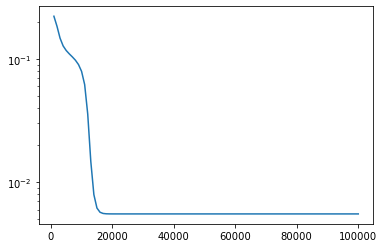

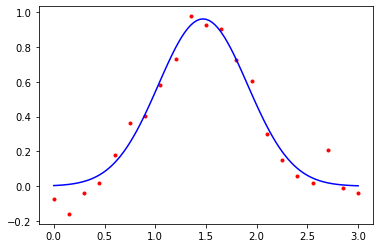

In [10]:
plt.figure()
plt.yscale('log')
plt.plot(iters, errors)
plt.show()

x2 = np.linspace(0.0, 3.0, 101)
plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x2, gauss(x2, beta), 'b')
plt.show()